##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE184880**

file previously downloaded:
GSE184880_RAW.tar

unzipped using 
``` bash
tar -xvf GSE184880_RAW.tar
```

This gives the following files: 
* GSM5599220_Norm1.barcodes.tsv.gz
* GSM5599220_Norm1.genes.tsv.gz
* GSM5599220_Norm1.matrix.mtx.gz
* GSM5599221_Norm2.barcodes.tsv.gz
* GSM5599221_Norm2.genes.tsv.gz
* GSM5599221_Norm2.matrix.mtx.gz
* GSM5599222_Norm3.barcodes.tsv.gz
* GSM5599222_Norm3.genes.tsv.gz
* GSM5599222_Norm3.matrix.mtx.gz
* GSM5599223_Norm4.barcodes.tsv.gz
* GSM5599223_Norm4.genes.tsv.gz
* GSM5599223_Norm4.matrix.mtx.gz
* GSM5599224_Norm5.barcodes.tsv.gz
* GSM5599224_Norm5.genes.tsv.gz
* GSM5599224_Norm5.matrix.mtx.gz
* GSM5599225_Cancer1.barcodes.tsv.gz
* GSM5599225_Cancer1.genes.tsv.gz
* GSM5599225_Cancer1.matrix.mtx.gz
* GSM5599226_Cancer2.barcodes.tsv.gz
* GSM5599226_Cancer2.genes.tsv.gz
* GSM5599226_Cancer2.matrix.mtx.gz
* GSM5599227_Cancer3.barcodes.tsv.gz
* GSM5599227_Cancer3.genes.tsv.gz
* GSM5599227_Cancer3.matrix.mtx.gz
* GSM5599228_Cancer4.barcodes.tsv.gz
* GSM5599228_Cancer4.genes.tsv.gz
* GSM5599228_Cancer4.matrix.mtx.gz
* GSM5599229_Cancer5.barcodes.tsv.gz
* GSM5599229_Cancer5.genes.tsv.gz
* GSM5599229_Cancer5.matrix.mtx.gz
* GSM5599230_Cancer6.barcodes.tsv.gz
* GSM5599230_Cancer6.genes.tsv.gz
* GSM5599230_Cancer6.matrix.mtx.gz
* GSM5599231_Cancer7.barcodes.tsv.gz
* GSM5599231_Cancer7.genes.tsv.gz
* GSM5599231_Cancer7.matrix.mtx.gz

Files were then organised into seperate folders for each patient and named with correct file names.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE184880')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE184880"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#load all datasets
OC_Cancer1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer1")
OC_Cancer2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer2")
OC_Cancer3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer3")
OC_Cancer4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer4")
OC_Cancer5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer5")
OC_Cancer6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer6")
OC_Cancer7.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer7")
OC_Norm1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm1")
OC_Norm2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm2")
OC_Norm3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm3")
OC_Norm4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm4")
OC_Norm5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm5")

In [4]:
#Add dataset info to colnames
colnames(OC_Cancer1.data) <- paste0("GSE184880_Cancer1_", colnames(OC_Cancer1.data))
colnames(OC_Cancer2.data) <- paste0("GSE184880_Cancer2_", colnames(OC_Cancer2.data))
colnames(OC_Cancer3.data) <- paste0("GSE184880_Cancer3_", colnames(OC_Cancer3.data))
colnames(OC_Cancer4.data) <- paste0("GSE184880_Cancer4_", colnames(OC_Cancer4.data))
colnames(OC_Cancer5.data) <- paste0("GSE184880_Cancer5_", colnames(OC_Cancer5.data))
colnames(OC_Cancer6.data) <- paste0("GSE184880_Cancer6_", colnames(OC_Cancer6.data))
colnames(OC_Cancer7.data) <- paste0("GSE184880_Cancer7_", colnames(OC_Cancer7.data))
colnames(OC_Norm1.data) <- paste0("GSE184880_Norm1_", colnames(OC_Norm1.data))
colnames(OC_Norm2.data) <- paste0("GSE184880_Norm2_", colnames(OC_Norm2.data))
colnames(OC_Norm3.data) <- paste0("GSE184880_Norm3_", colnames(OC_Norm3.data))
colnames(OC_Norm4.data) <- paste0("GSE184880_Norm4_", colnames(OC_Norm4.data))
colnames(OC_Norm5.data) <- paste0("GSE184880_Norm5_", colnames(OC_Norm5.data))

In [5]:
head(colnames(OC_Cancer1.data))

[1] "GSE184880_Cancer1_AAACCCAAGTATAGGT-1"
[2] "GSE184880_Cancer1_AAACCCACAAGGTACG-1"
[3] "GSE184880_Cancer1_AAACCCACACCATAAC-1"
[4] "GSE184880_Cancer1_AAACCCACAGCTGCCA-1"
[5] "GSE184880_Cancer1_AAACCCACATAACAGA-1"
[6] "GSE184880_Cancer1_AAACCCACATGACGGA-1"

In [6]:
#create seperate seurat object for each sample
OC_Cancer1 <- CreateSeuratObject(counts = OC_Cancer1.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer1@meta.data$sample_type <- "tumour"
OC_Cancer1@meta.data$cancer_type <- "HGSOC"
OC_Cancer1@meta.data$patient_id <- "Cancer1"
OC_Cancer1@meta.data$sample_id <- "GSE184880_HGSOC_Cancer1"

In [7]:
#Repeat for remaining samples

#create seperate seurat object for each sample
OC_Cancer2 <- CreateSeuratObject(counts = OC_Cancer2.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer2@meta.data$sample_type <- "tumour"
OC_Cancer2@meta.data$cancer_type <- "HGSOC"
OC_Cancer2@meta.data$patient_id <- "Cancer2"
OC_Cancer2@meta.data$sample_id <- "GSE184880_HGSOC_Cancer2"

#create seperate seurat object for each sample
OC_Cancer3 <- CreateSeuratObject(counts = OC_Cancer3.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer3@meta.data$sample_type <- "tumour"
OC_Cancer3@meta.data$cancer_type <- "HGSOC"
OC_Cancer3@meta.data$patient_id <- "Cancer3"
OC_Cancer3@meta.data$sample_id <- "GSE184880_HGSOC_Cancer3"

#create seperate seurat object for each sample
OC_Cancer4 <- CreateSeuratObject(counts = OC_Cancer4.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer4@meta.data$sample_type <- "tumour"
OC_Cancer4@meta.data$cancer_type <- "HGSOC"
OC_Cancer4@meta.data$patient_id <- "Cancer4"
OC_Cancer4@meta.data$sample_id <- "GSE184880_HGSOC_Cancer4"

#create seperate seurat object for each sample
OC_Cancer5 <- CreateSeuratObject(counts = OC_Cancer5.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer5@meta.data$sample_type <- "tumour"
OC_Cancer5@meta.data$cancer_type <- "HGSOC"
OC_Cancer5@meta.data$patient_id <- "Cancer5"
OC_Cancer5@meta.data$sample_id <- "GSE184880_HGSOC_Cancer5"

#create seperate seurat object for each sample
OC_Cancer6 <- CreateSeuratObject(counts = OC_Cancer6.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer6@meta.data$sample_type <- "tumour"
OC_Cancer6@meta.data$cancer_type <- "HGSOC"
OC_Cancer6@meta.data$patient_id <- "Cancer6"
OC_Cancer6@meta.data$sample_id <- "GSE184880_HGSOC_Cancer6"

#create seperate seurat object for each sample
OC_Cancer7 <- CreateSeuratObject(counts = OC_Cancer7.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Cancer7@meta.data$sample_type <- "tumour"
OC_Cancer7@meta.data$cancer_type <- "HGSOC"
OC_Cancer7@meta.data$patient_id <- "Cancer7"
OC_Cancer7@meta.data$sample_id <- "GSE184880_HGSOC_Cancer7"

#create seperate seurat object for each sample
OC_Norm1 <- CreateSeuratObject(counts = OC_Norm1.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm1@meta.data$sample_type <- "Healthy_ovary"
OC_Norm1@meta.data$cancer_type <- "Healthy"
OC_Norm1@meta.data$patient_id <- "Norm1"
OC_Norm1@meta.data$sample_id <- "GSE184880_Healthy_Norm1"

#create seperate seurat object for each sample
OC_Norm2 <- CreateSeuratObject(counts = OC_Norm2.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm2@meta.data$sample_type <- "Healthy_ovary"
OC_Norm2@meta.data$cancer_type <- "Healthy"
OC_Norm2@meta.data$patient_id <- "Norm2"
OC_Norm2@meta.data$sample_id <- "GSE184880_Healthy_Norm2"

#create seperate seurat object for each sample
OC_Norm3 <- CreateSeuratObject(counts = OC_Norm3.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm3@meta.data$sample_type <- "Healthy_ovary"
OC_Norm3@meta.data$cancer_type <- "Healthy"
OC_Norm3@meta.data$patient_id <- "Norm3"
OC_Norm3@meta.data$sample_id <- "GSE184880_Healthy_Norm3"

#create seperate seurat object for each sample
OC_Norm4 <- CreateSeuratObject(counts = OC_Norm4.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm4@meta.data$sample_type <- "Healthy_ovary"
OC_Norm4@meta.data$cancer_type <- "Healthy"
OC_Norm4@meta.data$patient_id <- "Norm4"
OC_Norm4@meta.data$sample_id <- "GSE184880_Healthy_Norm4"

#create seperate seurat object for each sample
OC_Norm5 <- CreateSeuratObject(counts = OC_Norm5.data, project = "GSE184880", min.features = 200)

#add metadata to sample
OC_Norm5@meta.data$sample_type <- "Healthy_ovary"
OC_Norm5@meta.data$cancer_type <- "Healthy"
OC_Norm5@meta.data$patient_id <- "Norm5"
OC_Norm5@meta.data$sample_id <- "GSE184880_Healthy_Norm5"

In [8]:
head(OC_Norm3@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE184880_Norm3_AAACCCAAGACCAAAT-1 GSE184880  19746      5070        
GSE184880_Norm3_AAACCCAAGACTCTAC-1 GSE184880   4703      1765        
GSE184880_Norm3_AAACCCAAGAGCACTG-1 GSE184880  37518      6090        
GSE184880_Norm3_AAACCCAAGCCTGTCG-1 GSE184880   4413      1348        
GSE184880_Norm3_AAACCCAAGCTGGAGT-1 GSE184880   6284      2098        
GSE184880_Norm3_AAACCCAGTCGAACAG-1 GSE184880  49639      6291        
                                   sample_type   cancer_type patient_id
GSE184880_Norm3_AAACCCAAGACCAAAT-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAAGACTCTAC-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAAGAGCACTG-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAAGCCTGTCG-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAAGCTGGAGT-1 Healthy_ovary Healthy     Norm3     
GSE184880_Norm3_AAACCCAGTCGAACAG-1 Healthy_ovary Healthy     Norm3     
                                   sample_id              
GSE184880_Norm3_AAACCCAAGACCAAAT-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAAGACTCTAC-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAAGAGCACTG-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAAGCCTGTCG-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAAGCTGGAGT-1 GSE184880_Healthy_Norm3
GSE184880_Norm3_AAACCCAGTCGAACAG-1 GSE184880_Healthy_Norm3

In [9]:
#Merge seurat objects

OC <- merge(OC_Cancer1, y = c(OC_Cancer2, OC_Cancer3, OC_Cancer4, OC_Cancer5, OC_Cancer6, OC_Cancer7, OC_Norm1, OC_Norm2, OC_Norm3, OC_Norm4, OC_Norm5), project = "GSE184880")

In [11]:
OC
head(OC@meta.data)
tail(OC@meta.data)

An object of class Seurat 
27984 features across 64659 samples within 1 assay 
Active assay: RNA (27984 features, 0 variable features)
 12 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12

orig.ident nCount_RNA nFeature_RNA
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880   4528      1744        
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880  61565      6280        
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880  31254      6009        
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880   9374      2655        
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880   4304      1728        
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880   2659      1246        
                                     sample_type cancer_type patient_id
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAAGGTACG-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACACCATAAC-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATAACAGA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATGACGGA-1 tumour      HGSOC       Cancer1   
                                     sample_id              
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880_HGSOC_Cancer1
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880_HGSOC_Cancer1

orig.ident nCount_RNA nFeature_RNA
GSE184880_Norm5_TTTGGTTTCTATACGG-1 GSE184880   14248     4434        
GSE184880_Norm5_TTTGTTGAGTAACGTA-1 GSE184880    8668     3128        
GSE184880_Norm5_TTTGTTGCATCCTGTC-1 GSE184880     784      518        
GSE184880_Norm5_TTTGTTGGTAGTGCGA-1 GSE184880  120558     7912        
GSE184880_Norm5_TTTGTTGGTATCGTTG-1 GSE184880    1361      703        
GSE184880_Norm5_TTTGTTGGTCAGTCCG-1 GSE184880    8453     2043        
                                   sample_type   cancer_type patient_id
GSE184880_Norm5_TTTGGTTTCTATACGG-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGAGTAACGTA-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGCATCCTGTC-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGGTAGTGCGA-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGGTATCGTTG-1 Healthy_ovary Healthy     Norm5     
GSE184880_Norm5_TTTGTTGGTCAGTCCG-1 Healthy_ovary Healthy     Norm5     
                                   sample_id              
GSE184880_Norm5_TTTGGTTTCTATACGG-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGAGTAACGTA-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGCATCCTGTC-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGGTAGTGCGA-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGGTATCGTTG-1 GSE184880_Healthy_Norm5
GSE184880_Norm5_TTTGTTGGTCAGTCCG-1 GSE184880_Healthy_Norm5

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


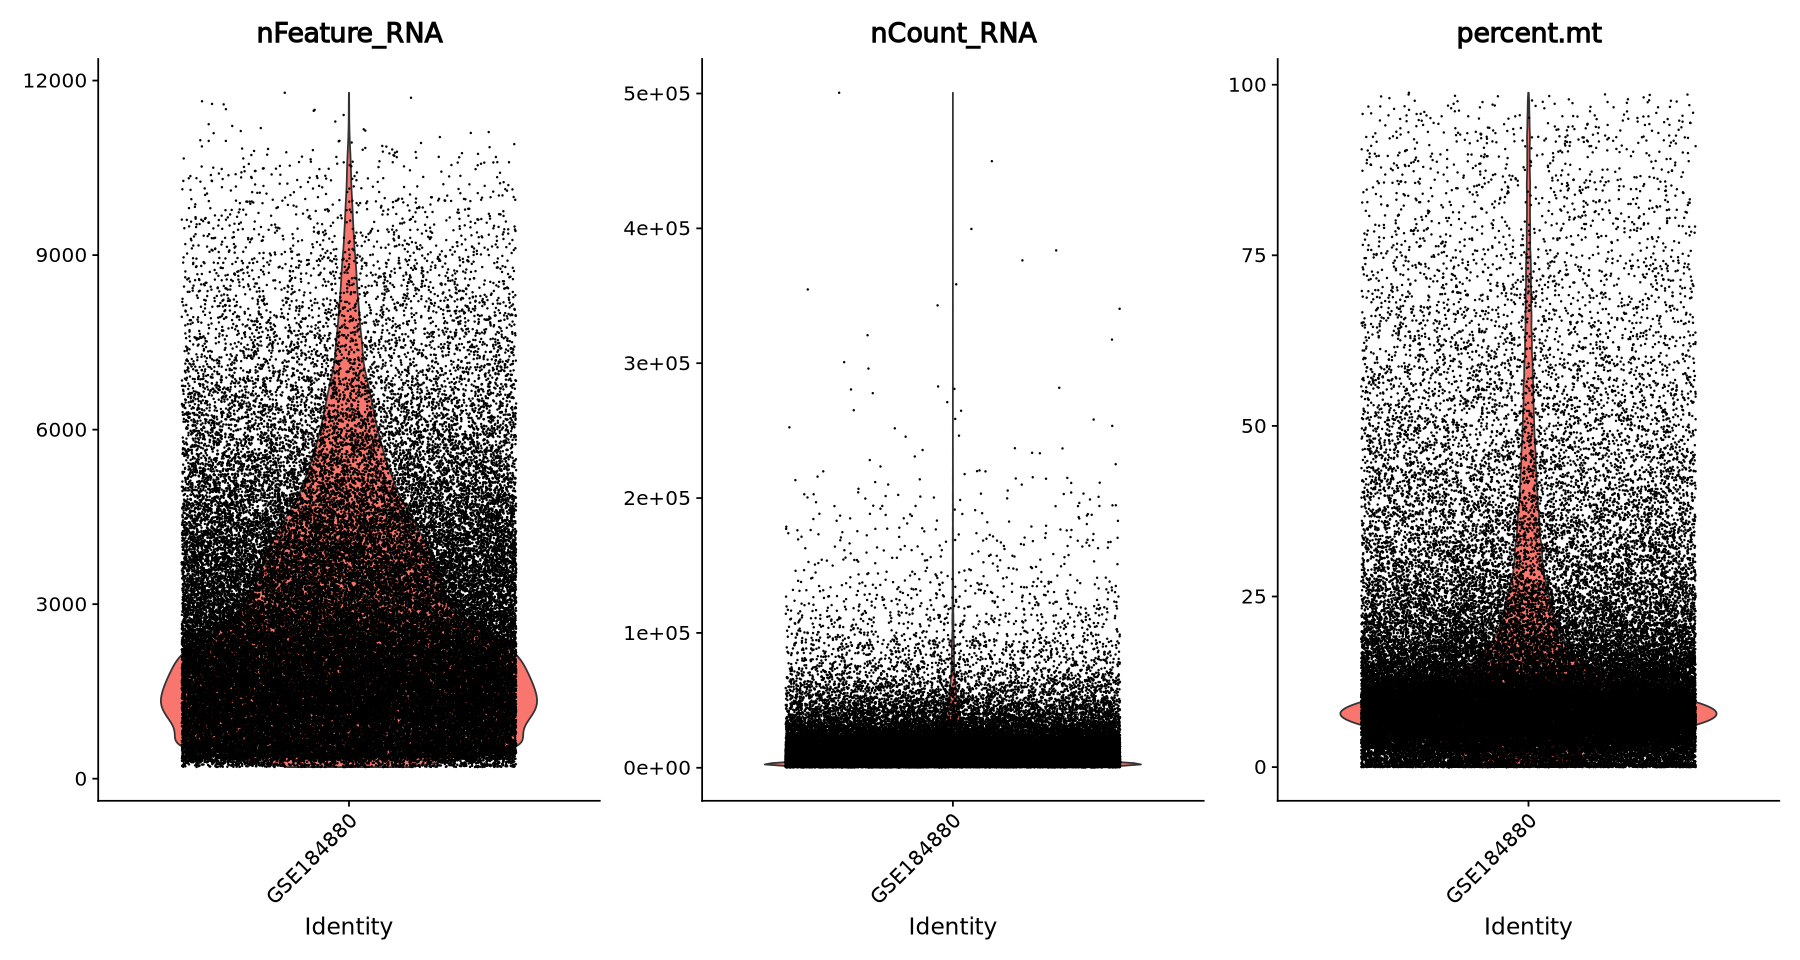

In [12]:
#QC Steps 
OC[["percent.mt"]] <- PercentageFeatureSet(OC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [13]:
#Normalise the data
OC <- NormalizeData(OC)
#Find variable features
OC <- FindVariableFeatures(OC, selection.method = "vst", nfeatures = 2000)
#Scale the data
OC <- ScaleData(OC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
OC <- RunPCA(OC, features = VariableFeatures(object = OC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer counts.11

Finding variable features for layer counts.12

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  CA

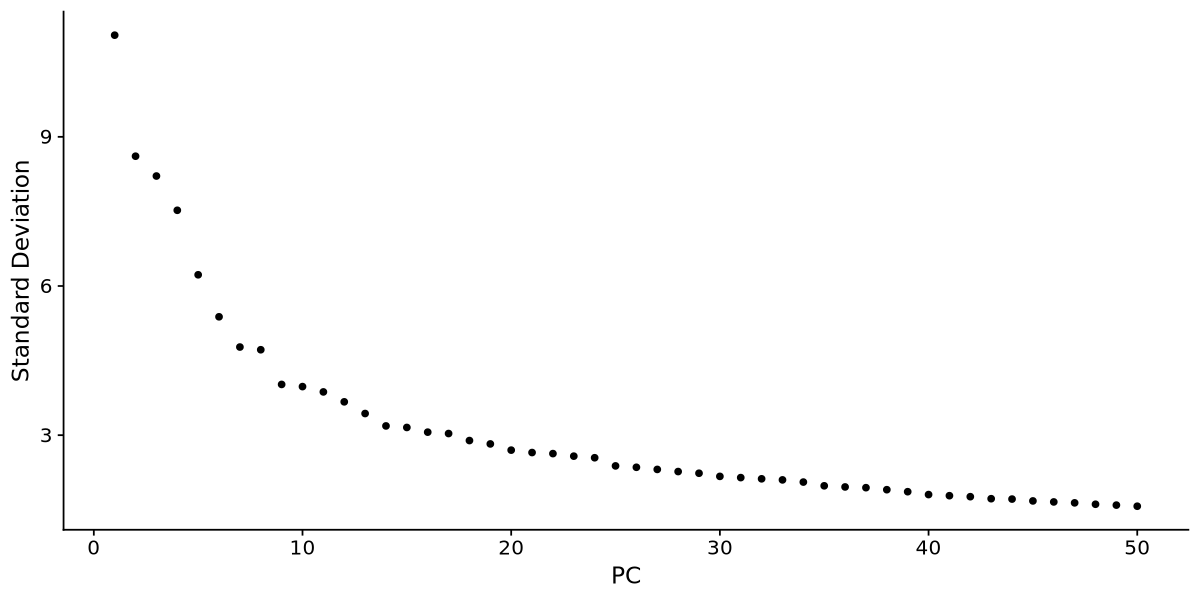

In [14]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(OC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [15]:
#Find neighbours (make sure number matches no. features chosen above)
OC <- FindNeighbors(OC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [16]:
#Run UMAP
OC <- RunUMAP(OC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:35:26 UMAP embedding parameters a = 0.9922 b = 1.112

13:35:26 Read 64659 rows and found 40 numeric columns

13:35:26 Using Annoy for neighbor search, n_neighbors = 30

13:35:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*


*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:35:31 Writing NN index file to temp file /scratch/temp/9043370/RtmpCUurBt/file1c79976a17052c

13:35:31 Searching Annoy index using 1 thread, search_k = 3000

13:35:49 Annoy recall = 100%

13:35:49 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:35:51 Initializing from normalized Laplacian + noise (using RSpectra)

13:35:54 Commencing optimization for 200 epochs, with 2893966 positive edges

13:36:16 Optimization finished



In [17]:
#Cluster, resolution here set to 0.2, originally tried 0.5 which gave heaps of clusters
OC <- FindClusters(OC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 64659
Number of edges: 2390406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9729
Number of communities: 24
Elapsed time: 11 seconds


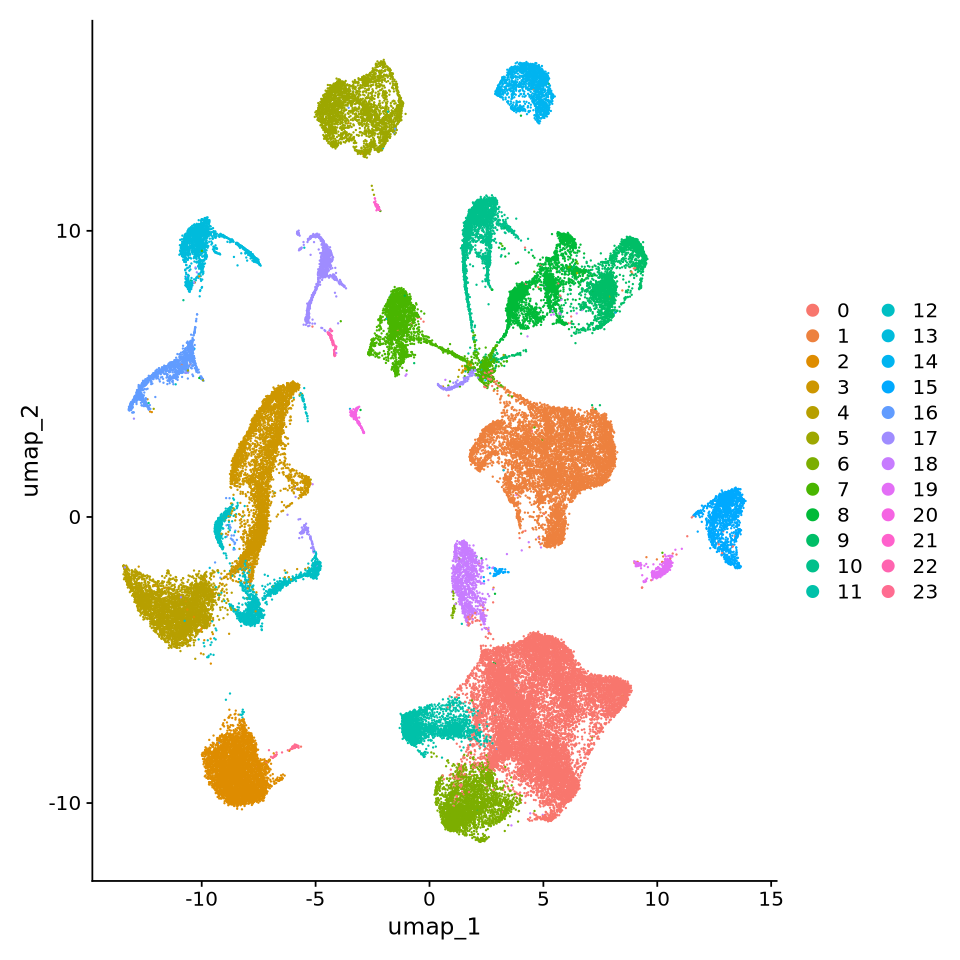

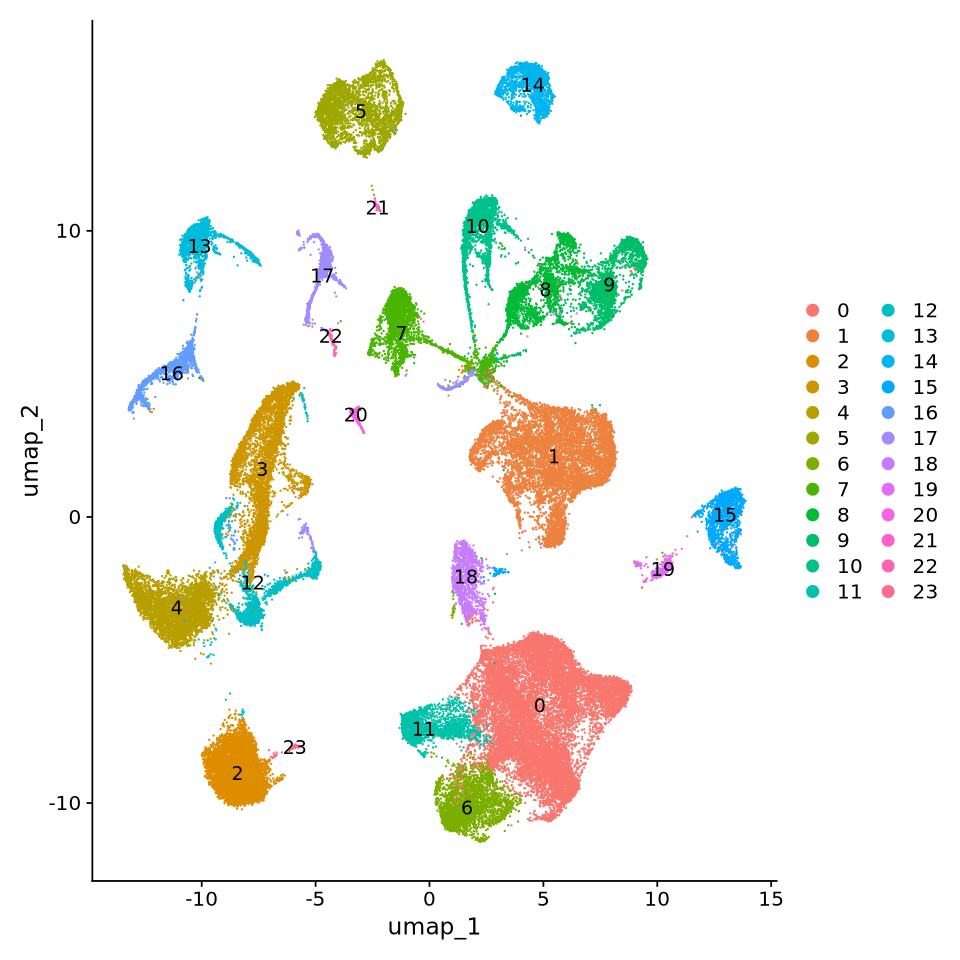

In [18]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=8)
DimPlot(OC, reduction = "umap")
DimPlot(OC, reduction = "umap", label=TRUE)

In [19]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(OC, file = "/scratch/user/s4436039/scdata/GSE184880/GSE184880.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

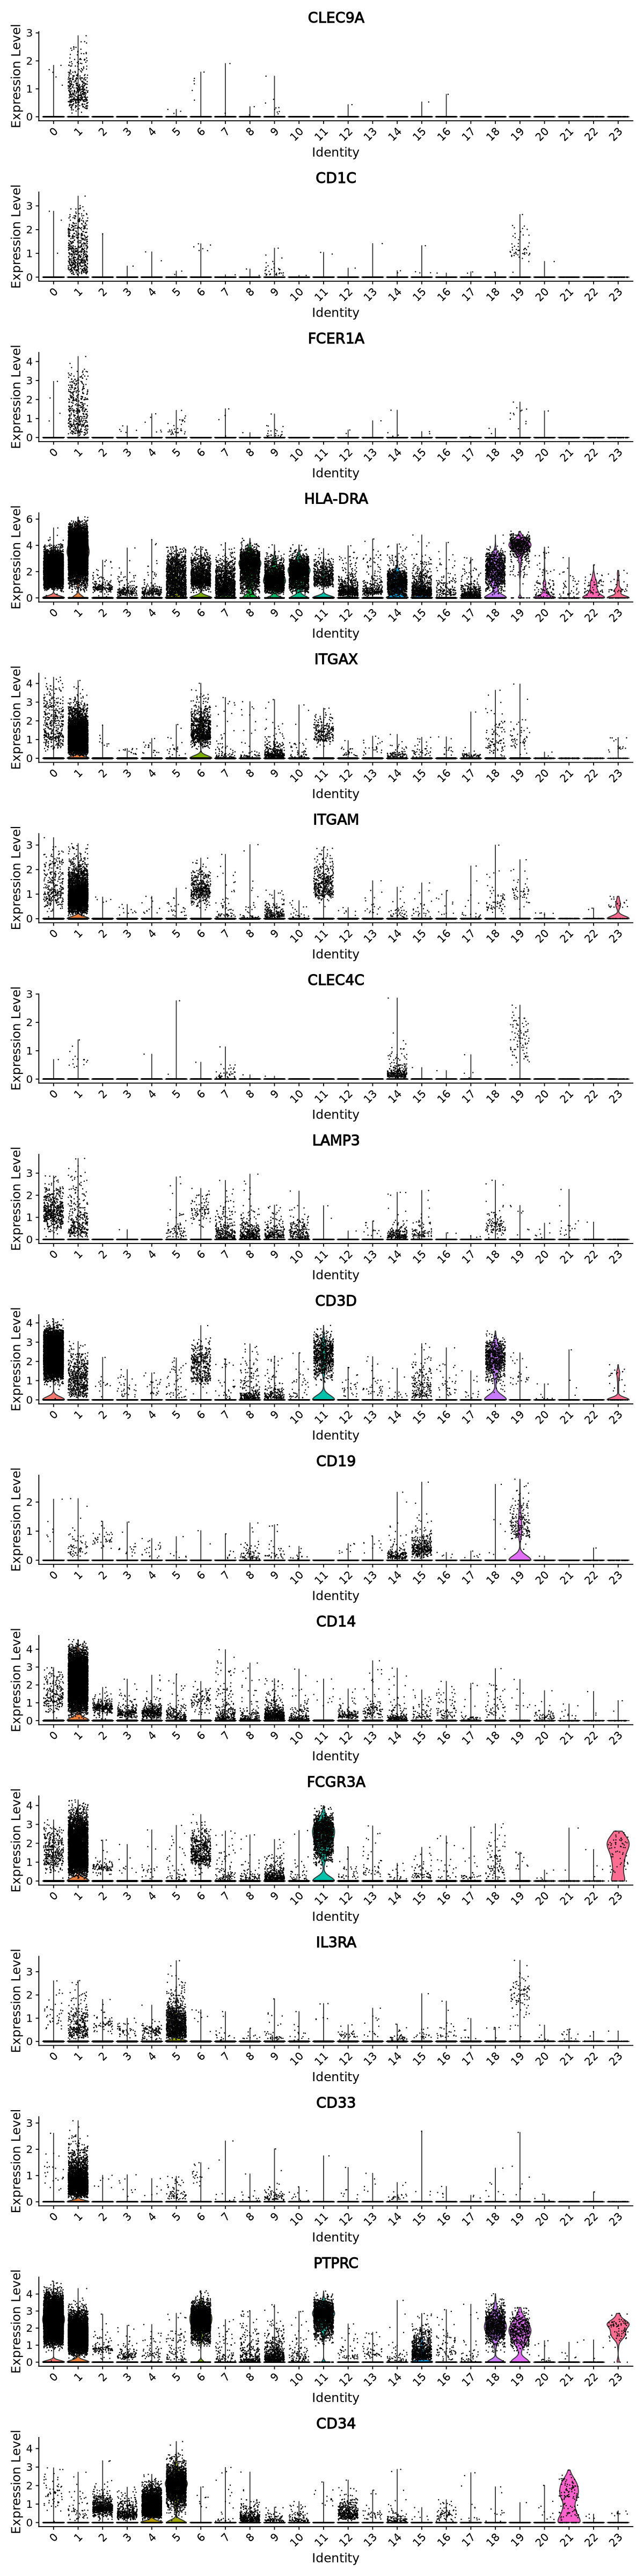

In [23]:
#Violin plots of classic markers
#ITGAX = CD11c
#ITGAM = CD11b
#BDCA2 = CLEC4C
#FCGR3A = CD16a
#CD123 = IL3RA
#CD45 = PTPRC
options(repr.plot.height=40, repr.plot.width=10)
VlnPlot(OC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A", "IL3RA", "CD33", "PTPRC", "CD34"), ncol=1)

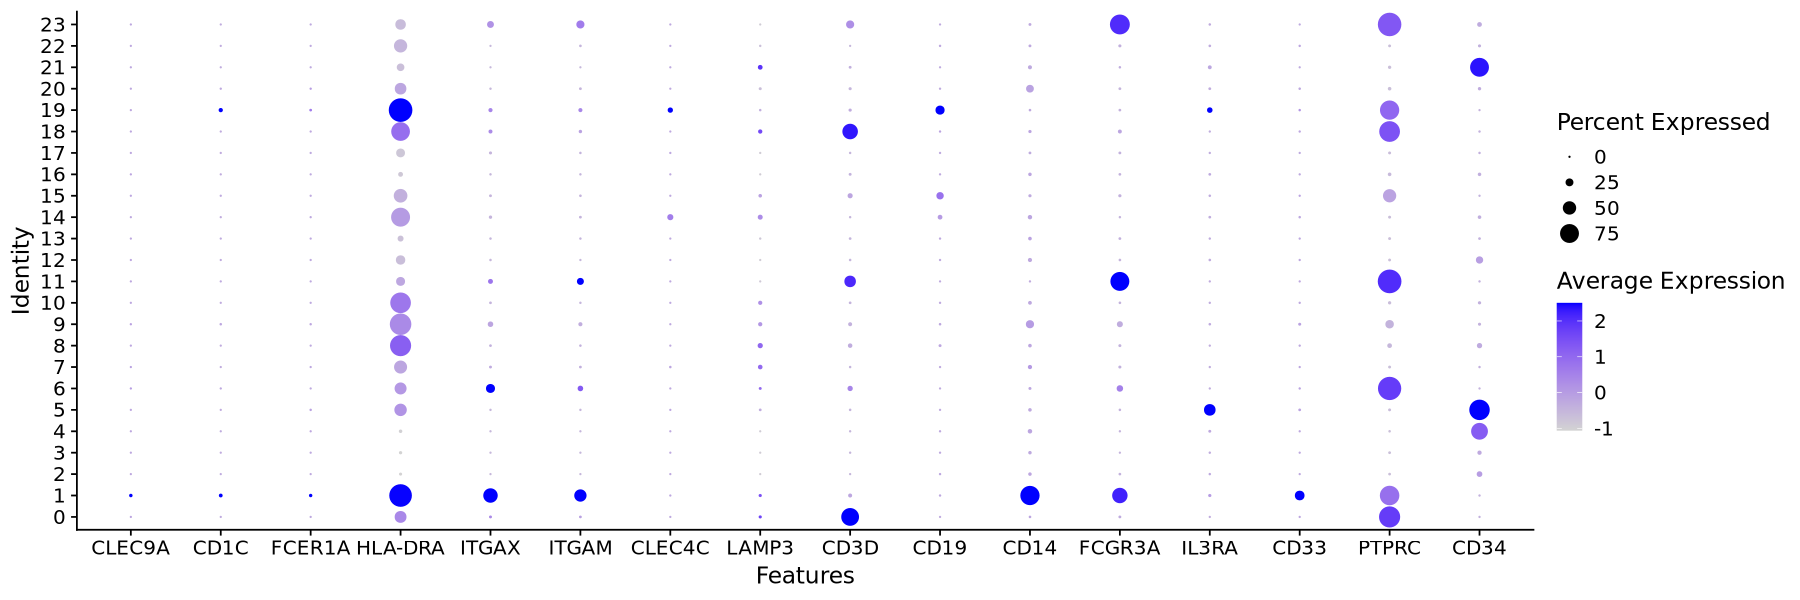

In [24]:
#Same as above but dot plot
options(repr.plot.height=5, repr.plot.width=15)
DotPlot(OC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A", "IL3RA", "CD33", "PTPRC", "CD34"))

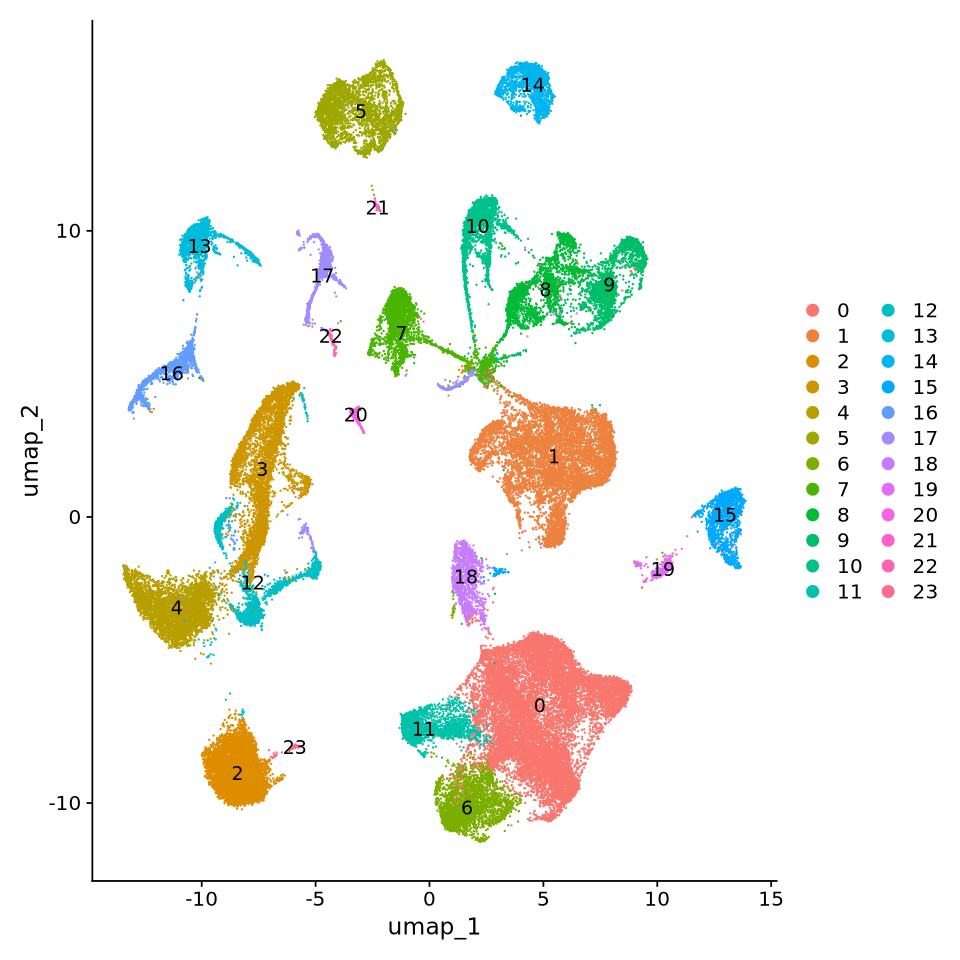

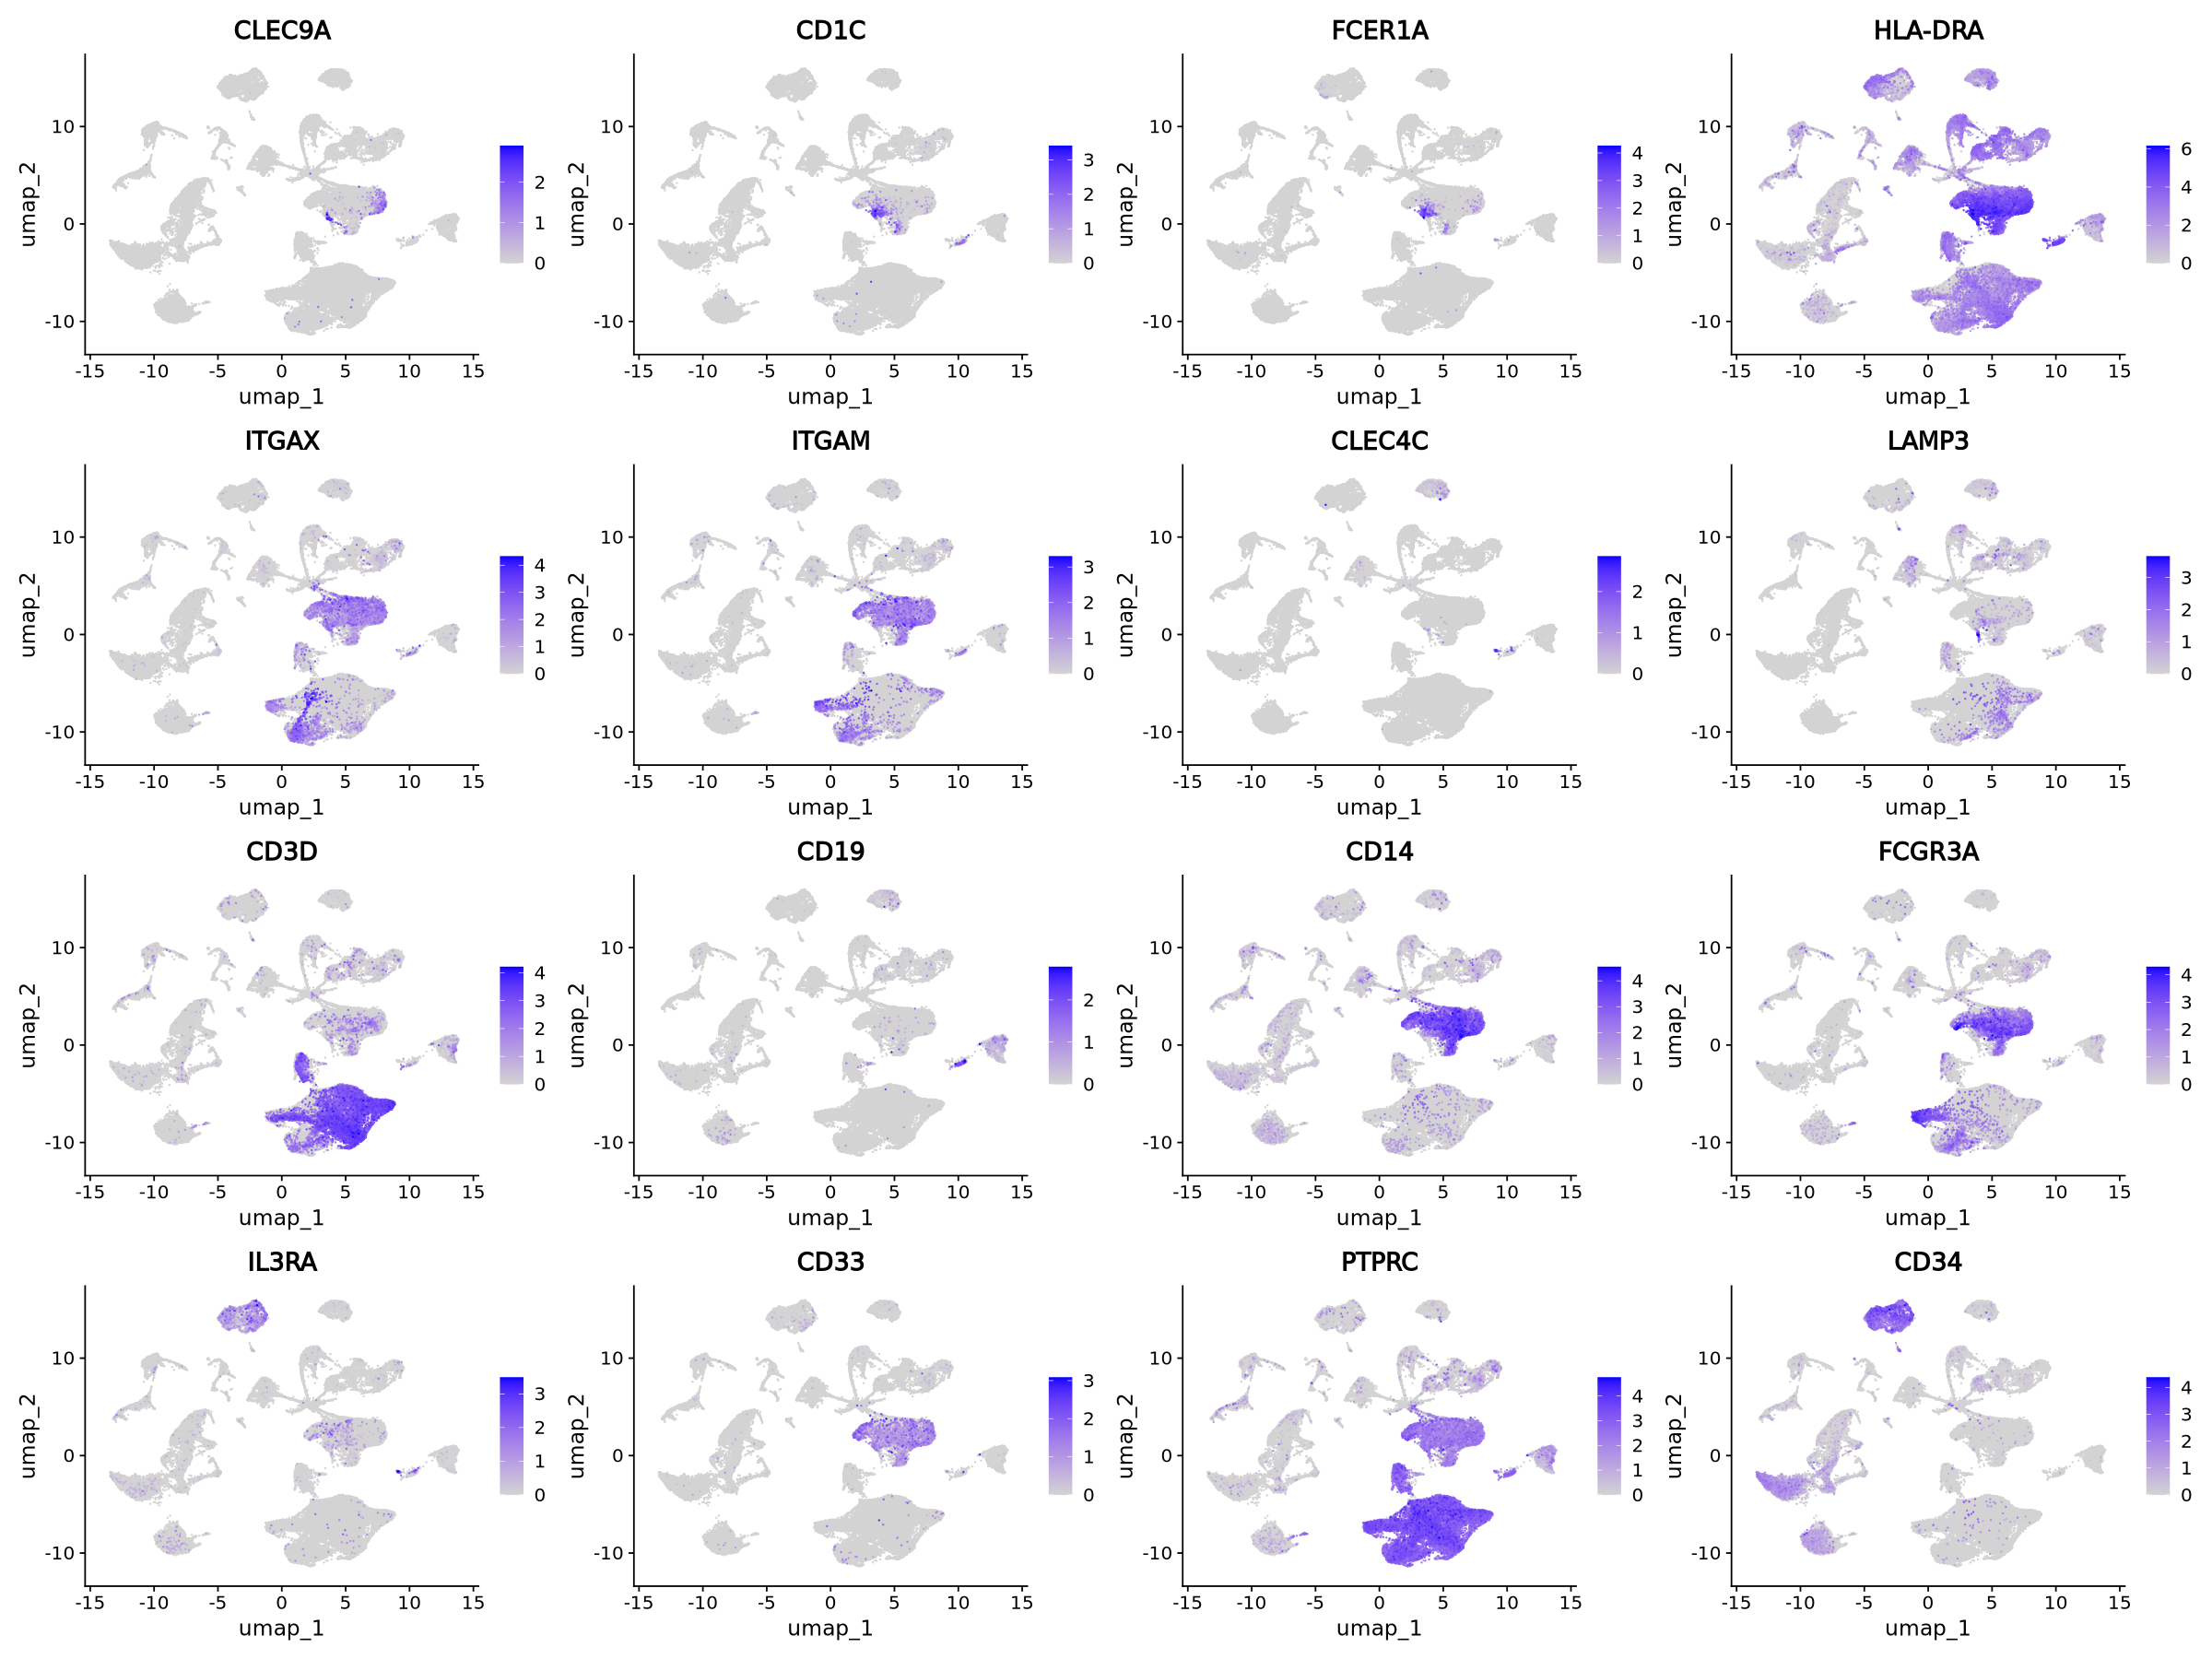

In [25]:
#Same again but plotted over UMAP
options(repr.plot.height=8, repr.plot.width=8)
DimPlot(OC, reduction = "umap", label=TRUE)

options(repr.plot.height=15, repr.plot.width=20)
FeaturePlot(OC, features = c("CLEC9A", "CD1C", "FCER1A", "HLA-DRA", "ITGAX", "ITGAM", "CLEC4C", "LAMP3", "CD3D", "CD19", "CD14", "FCGR3A", "IL3RA", "CD33", "PTPRC", "CD34"), order = TRUE)

#### From above it looks like cluster 1 is the myeloid cells, now subsetting out cluster 1

In [24]:
head(OC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880   4528      1744        
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880  61563      6278        
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880  31254      6009        
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880   9374      2655        
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880   4304      1728        
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880   2659      1246        
                                     sample_type cancer_type patient_id
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAAGGTACG-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACACCATAAC-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATAACAGA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATGACGGA-1 tumour      HGSOC       Cancer1   
                                     percent.mt RNA_snn_res.0.5 seurat_clusters
GSE184880_Cancer1_AAACCCAAGTATAGGT-1  5.477032  0               0              
GSE184880_Cancer1_AAACCCACAAGGTACG-1 38.378572  9               9              
GSE184880_Cancer1_AAACCCACACCATAAC-1 12.798362  9               9              
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 15.980371  2               1              
GSE184880_Cancer1_AAACCCACATAACAGA-1  9.223978  8               6              
GSE184880_Cancer1_AAACCCACATGACGGA-1  8.837909  2               1              
                                     RNA_snn_res.0.2
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 0              
GSE184880_Cancer1_AAACCCACAAGGTACG-1 9              
GSE184880_Cancer1_AAACCCACACCATAAC-1 9              
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 1              
GSE184880_Cancer1_AAACCCACATAACAGA-1 6              
GSE184880_Cancer1_AAACCCACATGACGGA-1 1

In [25]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.2 %in% c("1"))

In [26]:
myeloid_OC

An object of class Seurat 
22334 features across 7801 samples within 1 assay 
Active assay: RNA (22334 features, 2000 variable features)
 25 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, scale.data
 2 dimensional reductions calculated: pca, umap

In [27]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE184880/GSE184880_myeloid.RDS")

#### Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE184880/ /QRISdata/Q5935/nikita/scdata/GSE184880
```